# TASK 1 - Use classification technique for prediction of Graduate Admissions from an Indian perspective.

The parameters included are :

GRE Scores (out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

## Basic checks

In [3]:
#Top 5 rows of dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Last Five rows
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
#Total number of rows and columns
df.shape

(500, 9)

* Dataset contains 9 features with 500 observations.

In [6]:
# Check columns in data
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# Chech Statistics of data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
#Checking null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
#Checking duplicates
df.duplicated().sum()

0

In [11]:
#Dropping columns 
df.drop(columns = 'Serial No.', inplace = True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Exploratory DA

##### Univariate Analysis

In [12]:
df['GRE Score'].describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

Text(0.5, 1.0, 'GRE Score')

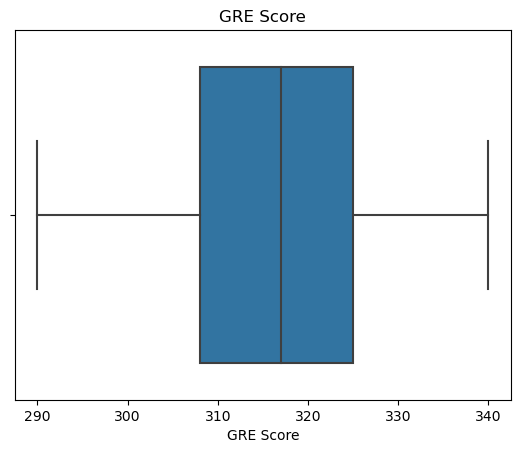

In [13]:
sns.boxplot(df['GRE Score'])
plt.title('GRE Score')

Text(0.5, 1.0, 'GRE SCORE')

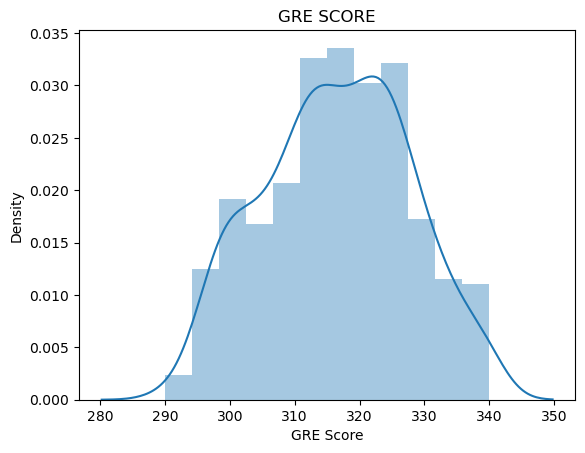

In [14]:
sns.distplot(df['GRE Score'])
plt.title('GRE SCORE')

In [15]:
df['TOEFL Score'].describe()

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

Text(0.5, 1.0, 'TOEFL Score')

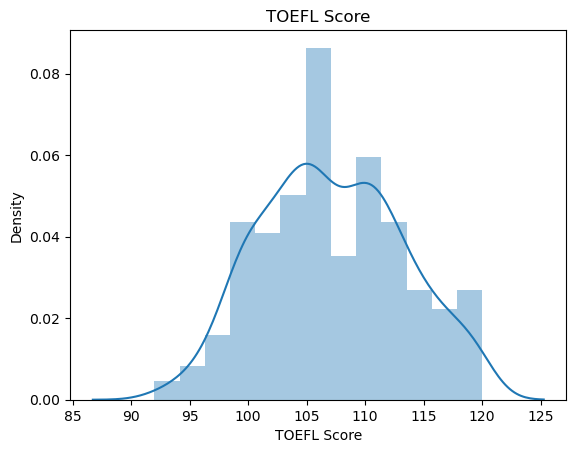

In [16]:
sns.distplot(df['TOEFL Score'])
plt.title('TOEFL Score')

Text(0.5, 1.0, 'TOEFL Score')

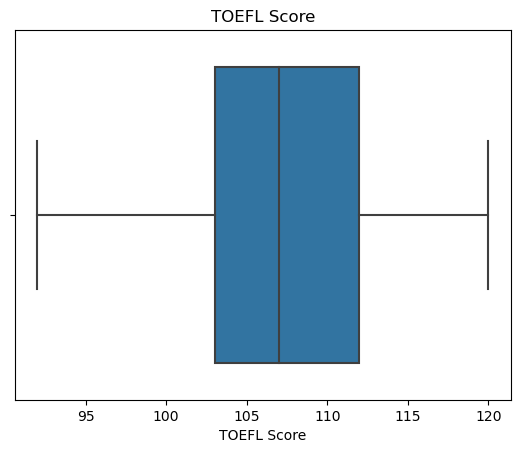

In [17]:
sns.boxplot(df['TOEFL Score'])
plt.title('TOEFL Score')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


Text(0.5, 1.0, 'University Rating (Total Count)')

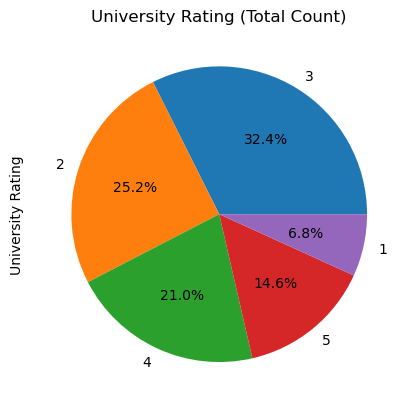

In [19]:
df['University Rating'].value_counts().plot(kind='pie', autopct ='%1.1f%%')
plt.title('University Rating (Total Count)')

<AxesSubplot:title={'center':'Statement of Purpose'}>

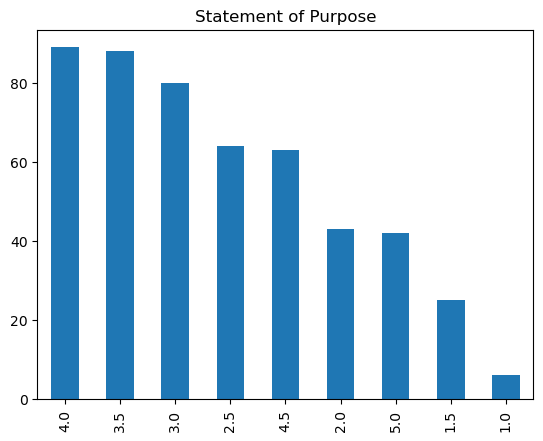

In [20]:
df.SOP.value_counts().plot(kind='bar', title='Statement of Purpose')

<AxesSubplot:title={'center':'Letter of Recommendation'}>

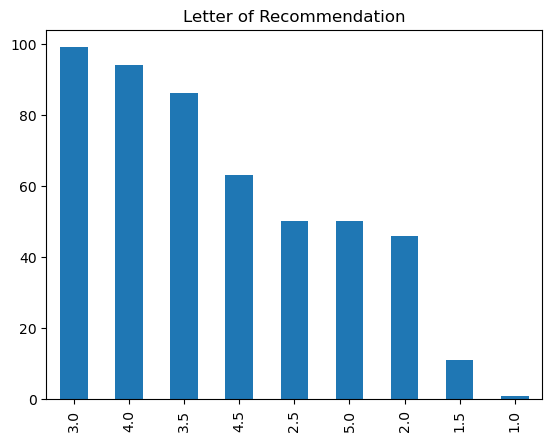

In [21]:
df['LOR '].value_counts().plot(kind='bar', title='Letter of Recommendation')

Text(0.5, 0.98, 'Univariate Analysis of Undergraduate GPA')

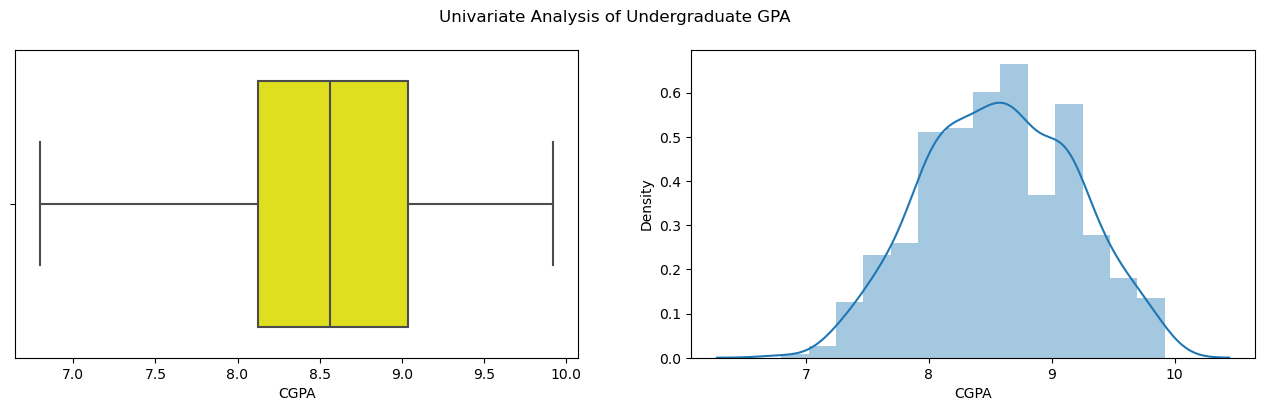

In [22]:
fig, axes = plt.subplots(1,2, figsize=(16,4))
sns.boxplot(df['CGPA'], ax=axes[0], color='yellow')
sns.distplot(df['CGPA'], ax=axes[1])
fig.suptitle('Univariate Analysis of Undergraduate GPA')


<AxesSubplot:title={'center':'Research Experience'}>

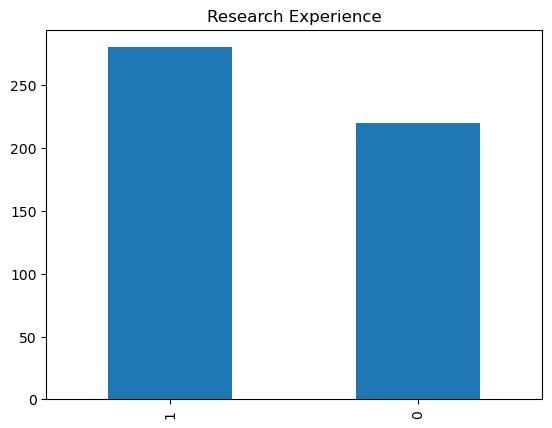

In [23]:
df.Research.value_counts().plot(kind='bar', title='Research Experience')

#1- Represent Research Experience
#0- No Research Experience

In [24]:
df['Chance of Admit '].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64

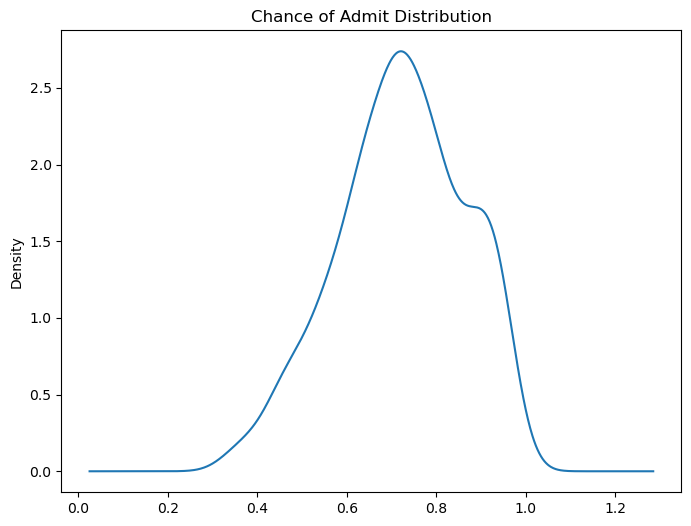

In [25]:
df['Chance of Admit '].plot(kind='kde',figsize=(8,6), title="Chance of Admit Distribution")
plt.show()

#### Bivariate Analysis

In [26]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0.5, 1.0, 'GRE Score VS Chance of Admit')

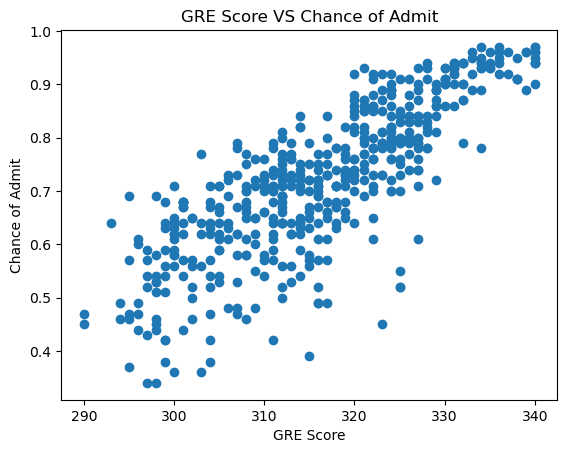

In [27]:
plt.scatter(x=df['GRE Score'], y =df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score VS Chance of Admit')

Text(0.5, 1.0, 'TOEFL Score VS Chance of Admit')

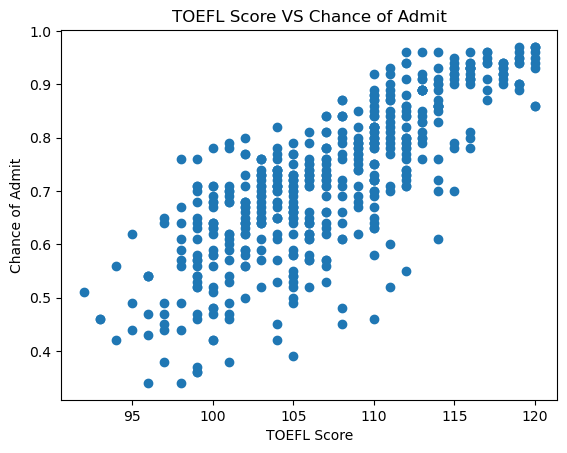

In [28]:
plt.scatter(x=df['TOEFL Score'], y =df['Chance of Admit '])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score VS Chance of Admit')

Text(0.5, 1.0, 'CGPA VS Chance of Admit')

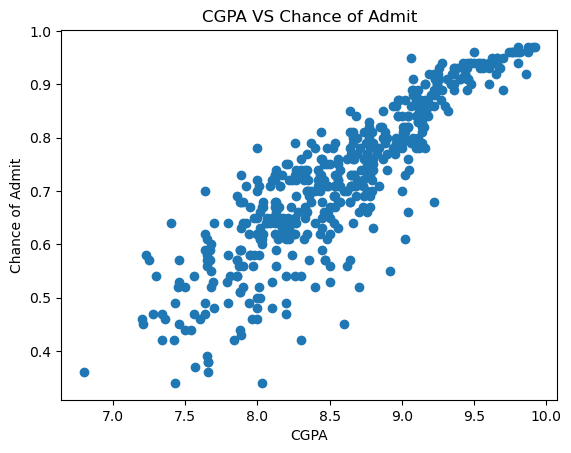

In [29]:
plt.scatter(x=df['CGPA'], y =df['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA VS Chance of Admit')

Text(0.5, 1.0, 'Research VS Chance of Admit')

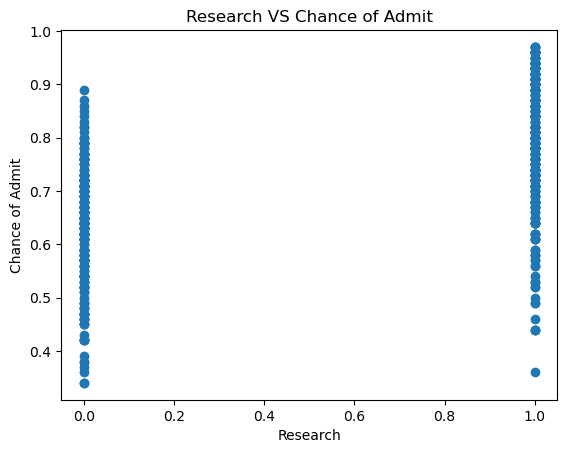

In [30]:
plt.scatter(x=df['Research'], y =df['Chance of Admit '])
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.title('Research VS Chance of Admit')

<AxesSubplot:>

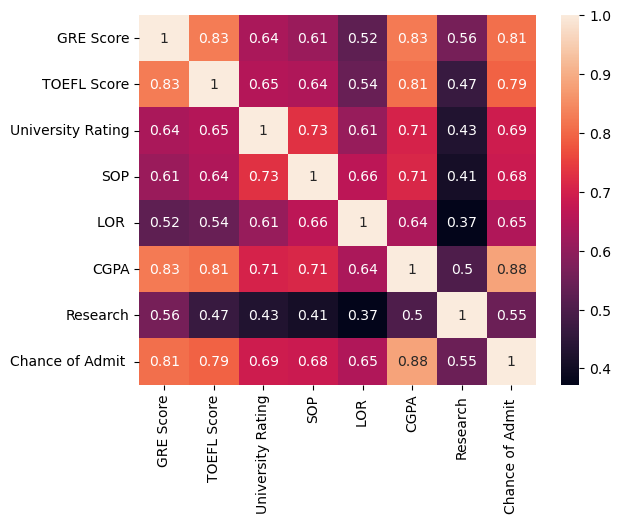

In [31]:
sns.heatmap(df.corr(), annot=True)

### MODEL DEVELOPMENT

In [32]:
X = df.iloc[:, :-1]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [33]:
y = df.iloc[:,-1].apply(lambda y_value: 1 if y_value>= 0.8 else 0)
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Chance of Admit , dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error

In [36]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()]]


In [37]:
pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.93
Decision Tree Classification : 0.87
Random Forest Classification : 0.91
Gradient Boosting Classification : 0.88
Ada Boosting Classification : 0.89
Extra Tree Classification : 0.91
K-Neighbors Classification : 0.85
Support Vector Classification : 0.62


In [38]:
y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier']
x_ax= pred

Text(0.5, 0, 'ACCURACY')

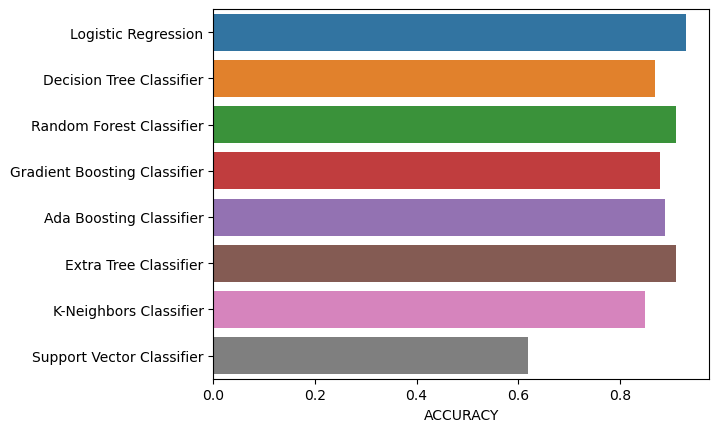

In [39]:
sns.barplot(x=x_ax,y=y_ax)
plt.xlabel('ACCURACY')

**Best Model is Logistic Regression : 0.93**

In [40]:
data = (324,107,4,4.0,4.5,8.87,1)
array = np.asarray(data)
final = array.reshape(1,-1)
LReg= LogisticRegression()
mod = LReg.fit(X_train, y_train)
LR_pred = mod.predict(final)
if (LR_pred[0] == 1):
    print('Selected for Admission')
else: 
    print('Not Selected for Admission')
    
print(LR_pred)

Not Selected for Admission
[0]


In [41]:
data = (337,118,4,4.5,4.5,9.65,1)
array = np.asarray(data)
final = array.reshape(1,-1)
LReg= LogisticRegression()
mod = LReg.fit(X_train, y_train)
LR_pred = mod.predict(final)
if (LR_pred[0] == 1):
    print('Selected for Admission')
else: 
    print('Not Selected for Admission')
    
print(LR_pred)

Selected for Admission
[1]


In [42]:
data = (314,103,2,2.0,3.0,8.21,0)
array = np.asarray(data)
final = array.reshape(1,-1)
LReg= LogisticRegression()
mod = LReg.fit(X_train, y_train)
LR_pred = mod.predict(final)
if (LR_pred[0] == 1):
    print('Selected for Admission')
else: 
    print('Not Selected for Admission')
    
print(LR_pred)

Not Selected for Admission
[0]
